In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data=pd.read_csv("/content/Food App Reviews.csv")
data.head()

,Review
0,Delivery was faster than a ninja on caffeine. ...
1,Im pretty sure they had a wall made of recycle...
2,Dude Im not even mad they were late. Food arri...
3,Chhole bhature yaar! Sunday indulgence crispy ...
4,The place had a vibe but I cant quite put my f...


Converting the Reviews column to a List to be fed into an embedding model, in order to generate embeddings

In [75]:
reviews=data['Review'].tolist()
reviews[:10]

['Delivery was faster than a ninja on caffeine. Im ready to chow down!',
 'Im pretty sure they had a wall made of recycled cans. Or was it shoes?',
 'Dude Im not even mad they were late. Food arrived like a surprise party!',
 'Chhole bhature yaar! Sunday indulgence crispy bhature FTW.',
 'The place had a vibe but I cant quite put my finger on it. Hipster? Unicorn?',
 'Hakka noodles FTW! Desi-Chinese fusion for life.',
 'Pasta was alright yaar. More masala couldve made it sing.',
 'Im telling you it was like stepping into the future. Or was it the 90s?',
 'I was starving but the food came faster than I could say hangry. Good stuff.',
 'Burgers are my jam but this one was kinda meh. Needed more zing.']

Using SentenceTransformers to generate Sentence level Embeddings

Specifically, **The Mini_LM-6-v2 Model**

In [76]:
#!pip install sentence-transformers

In [1]:
from sentence_transformers import SentenceTransformer

ModuleNotFoundError: No module named 'sentence_transformers'

In [78]:
model_name= "all-MiniLM-L6-v2"
model= SentenceTransformer(model_name)

In [79]:
embeddings=model.encode(reviews)

In [80]:
embeddings[:10]

array([[-2.16154996e-02, -2.37903744e-02,  1.38450731e-02, ...,
        -6.15601949e-02,  1.63017269e-02,  5.54934423e-03],
       [-9.73157808e-02,  1.10763572e-01, -1.29521228e-02, ...,
        -5.25416918e-02,  1.60634741e-02,  1.04477525e-01],
       [ 1.57085378e-02,  1.58678517e-02,  9.41281114e-03, ...,
         4.04531844e-02, -1.06743112e-01, -1.16561959e-02],
       ...,
       [-4.39310782e-02,  7.14947432e-02,  1.28977308e-02, ...,
        -9.30987298e-03, -3.51440649e-05, -1.93285439e-02],
       [-2.32147090e-02,  5.34278862e-02,  1.94655899e-02, ...,
        -5.61597152e-03, -8.23437646e-02,  6.48906380e-02],
       [-8.86445940e-02,  6.28960133e-02,  9.51814000e-03, ...,
        -2.20437068e-02, -3.48640569e-02,  4.35129628e-02]], dtype=float32)

In [81]:
len(reviews)

101

In [82]:
embeddings.shape

(101, 384)

Visualization of embeddings through Dimensionality Reduction

Specifically using UMAP for dimensionality reduction

In [83]:
#!pip install umap-learn

In [84]:
from umap import UMAP

In [85]:
embeddings=model.encode(reviews,convert_to_tensor=True)

In [86]:
embeddings[:10]

tensor([[-2.1615e-02, -2.3790e-02,  1.3845e-02,  ..., -6.1560e-02,
          1.6302e-02,  5.5493e-03],
        [-9.7316e-02,  1.1076e-01, -1.2952e-02,  ..., -5.2542e-02,
          1.6063e-02,  1.0448e-01],
        [ 1.5709e-02,  1.5868e-02,  9.4128e-03,  ...,  4.0453e-02,
         -1.0674e-01, -1.1656e-02],
        ...,
        [-4.3931e-02,  7.1495e-02,  1.2898e-02,  ..., -9.3099e-03,
         -3.5144e-05, -1.9329e-02],
        [-2.3215e-02,  5.3428e-02,  1.9466e-02,  ..., -5.6160e-03,
         -8.2344e-02,  6.4891e-02],
        [-8.8645e-02,  6.2896e-02,  9.5181e-03,  ..., -2.2044e-02,
         -3.4864e-02,  4.3513e-02]])

In [87]:
reducer=UMAP(n_components=2,metric='cosine')
embeddings_2d=reducer.fit_transform(embeddings)

In [88]:
embeddings_2d[:10]

array([[-1.2296668,  5.96315  ],
       [ 2.9289095,  4.8882065],
       [-0.5125711,  5.113647 ],
       [-3.8718374,  1.1592731],
       [ 3.8227122,  4.7644   ],
       [-4.9514503,  2.0816233],
       [-5.026261 ,  2.8995798],
       [ 3.9552565,  5.3712525],
       [-1.2046111,  4.8669305],
       [-2.4032495,  3.444207 ]], dtype=float32)

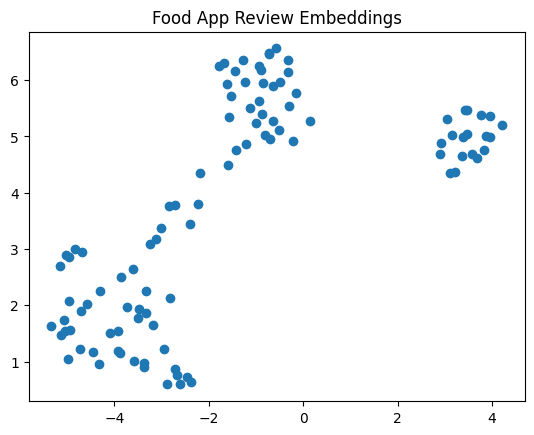

In [89]:
plt.scatter(embeddings_2d[:,0],embeddings_2d[:,1],marker='o')
plt.title('Food App Review Embeddings')
plt.show()

Cluster and Visualise the Embeddings with Plotly for a better understanding

In [90]:
from sklearn.cluster import KMeans

In [91]:
num_clusters=3
kmeans=KMeans(n_clusters=num_clusters)
cluster_labels=kmeans.fit_predict(embeddings_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [92]:
data['cluster_label']=cluster_labels

In [93]:
data.head()

,Review,cluster_label
0,Delivery was faster than a ninja on caffeine. ...,2
1,Im pretty sure they had a wall made of recycle...,0
2,Dude Im not even mad they were late. Food arri...,2
3,Chhole bhature yaar! Sunday indulgence crispy ...,1
4,The place had a vibe but I cant quite put my f...,0


In [94]:
#!pip install plotly

In [95]:
import plotly.express as px

# Create a DataFrame for the data
cluster_df = pd.DataFrame({
    'x': embeddings_2d[:, 0],
    'y': embeddings_2d[:, 1],
    'label': cluster_labels,
    'sentence': data['Review']
})

# Create an interactive scatter plot using plotly
fig = px.scatter(
    cluster_df,
    x='x', y='y',
    color='label',
    hover_name='sentence',
    title='Food App Reviews 2D Embeddings',
    labels={'label': 'Cluster'},
    width=800,  # Adjust the width as desired
    height=600,  # Adjust the height as desired
)

fig.update_traces(
    marker=dict(size=8)  # Adjust the size value as needed
)

# Set the background color to black
fig.update_layout(
    plot_bgcolor='white',
)

fig.show()

3D Embeddings

In [96]:
# Reduce dimensionality to 3 dimensions with UMAP

reducer = UMAP(n_components=3, metric='cosine')
embeddings_3d = reducer.fit_transform(embeddings)

In [97]:
# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [98]:
# Add cluster labels as a new column to the DataFrame
data['cluster_label'] = cluster_labels

In [99]:
data[:10]

,Review,cluster_label
0,Delivery was faster than a ninja on caffeine. ...,1
1,Im pretty sure they had a wall made of recycle...,0
2,Dude Im not even mad they were late. Food arri...,1
3,Chhole bhature yaar! Sunday indulgence crispy ...,2
4,The place had a vibe but I cant quite put my f...,0
5,Hakka noodles FTW! Desi-Chinese fusion for life.,2
6,Pasta was alright yaar. More masala couldve ma...,2
7,Im telling you it was like stepping into the f...,0
8,I was starving but the food came faster than I...,1
9,Burgers are my jam but this one was kinda meh....,1


In [100]:
# Create a DataFrame for the data
cluster_df = pd.DataFrame({
    'x': embeddings_3d[:, 0],
    'y': embeddings_3d[:, 1],
    'z': embeddings_3d[:, 2],
    'label': cluster_labels,
    'sentence': data['Review']
})

# Create a 3D scatter plot using plotly
fig = px.scatter_3d(
    cluster_df,
    x='x', y='y', z='z',
    color='label',
    hover_name='sentence',
    title='Food App Reviews 3D Embeddings',
    labels={'label': 'Cluster'},
)

fig.update_traces(
    marker=dict(size=5)  # Adjust the size value as needed
)

fig.show()

In [2]:
print("YOLO")

YOLO
